In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from imblearn.over_sampling import SMOTE, KMeansSMOTE, SVMSMOTE

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.metrics import plot_confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from functions import all_models as m
from functions import plot_importances
from functions import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('csv/tweet_sentiment.csv').drop(['Unnamed: 0'],axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62981 entries, 0 to 62980
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62981 non-null  float64
 1   tweet        62981 non-null  object 
 2   language     62981 non-null  object 
 3   date_time    62981 non-null  object 
 4   clean_tweet  62981 non-null  object 
 5   Compound     62981 non-null  float64
 6   Negative     62981 non-null  float64
 7   Neutral      62981 non-null  float64
 8   Positive     62981 non-null  float64
 9   Sentiment    62981 non-null  object 
dtypes: float64(5), object(5)
memory usage: 4.8+ MB


In [4]:
df = df[['tweet', 'clean_tweet', 'Sentiment']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62981 entries, 0 to 62980
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet        62981 non-null  object
 1   clean_tweet  62981 non-null  object
 2   Sentiment    62981 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


In [6]:
stop_words = stopwords.words('english')

x = df['clean_tweet']
y = df['Sentiment']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=16)

In [8]:
vectorizer = TfidfVectorizer(stop_words=stop_words, token_pattern='[a-zA-Z0-9]+')
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [9]:
objects = [LogisticRegression(fit_intercept=False, C=1e12, solver='saga'), 
           Pipeline([('ss', StandardScaler(with_mean=False)), ('knn', KNeighborsClassifier())]),
           Pipeline([('bz', Binarizer()), ('bayes', MultinomialNB())]),
           Pipeline([('ss', StandardScaler(with_mean=False)), ('svm', SVC())]),
           DecisionTreeClassifier(), 
           RandomForestClassifier(), 
           GradientBoostingClassifier(),
           AdaBoostClassifier(),
           XGBClassifier(),
           CatBoostClassifier(verbose=False)]
index = ['Logistic Regression', 'Nearest Neighbors', 'Naive Bayes', 'SVM', 
         'Decision Tree', 'Random Forest', 'Gradient Boost', 'AdaBoost', 'XGBoost', 'CatBoost']

Logistic Regression Results:


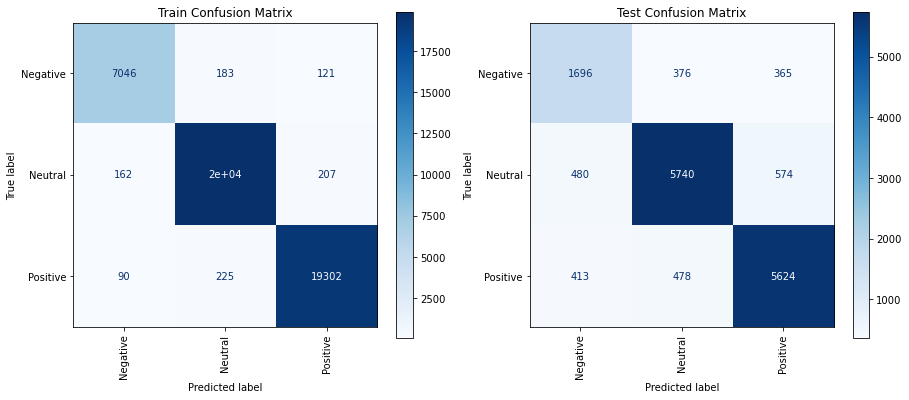

              precision    recall  f1-score   support

    Negative       0.66      0.70      0.67      2437
     Neutral       0.87      0.84      0.86      6794
    Positive       0.86      0.86      0.86      6515

    accuracy                           0.83     15746
   macro avg       0.79      0.80      0.80     15746
weighted avg       0.83      0.83      0.83     15746



Nearest Neighbors Results:


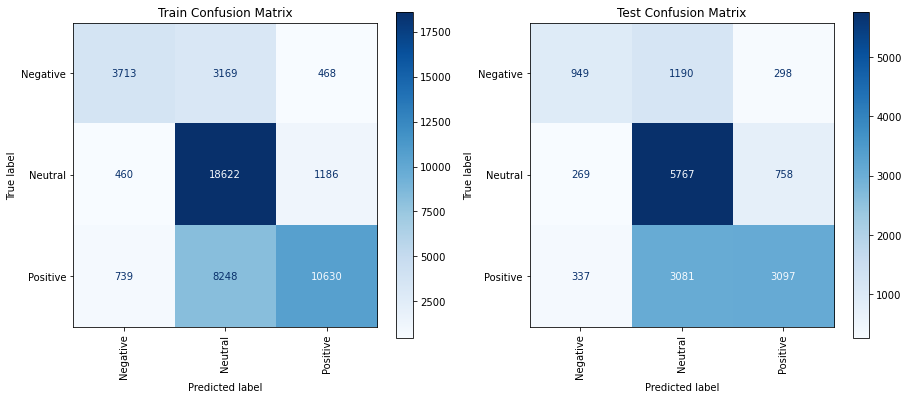

              precision    recall  f1-score   support

    Negative       0.61      0.39      0.48      2437
     Neutral       0.57      0.85      0.69      6794
    Positive       0.75      0.48      0.58      6515

    accuracy                           0.62     15746
   macro avg       0.64      0.57      0.58     15746
weighted avg       0.65      0.62      0.61     15746



Naive Bayes Results:


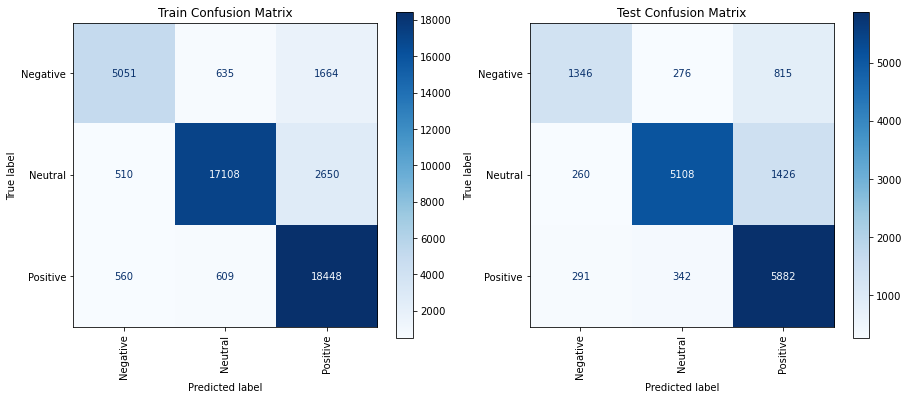

              precision    recall  f1-score   support

    Negative       0.71      0.55      0.62      2437
     Neutral       0.89      0.75      0.82      6794
    Positive       0.72      0.90      0.80      6515

    accuracy                           0.78     15746
   macro avg       0.78      0.74      0.75     15746
weighted avg       0.79      0.78      0.78     15746



SVM Results:


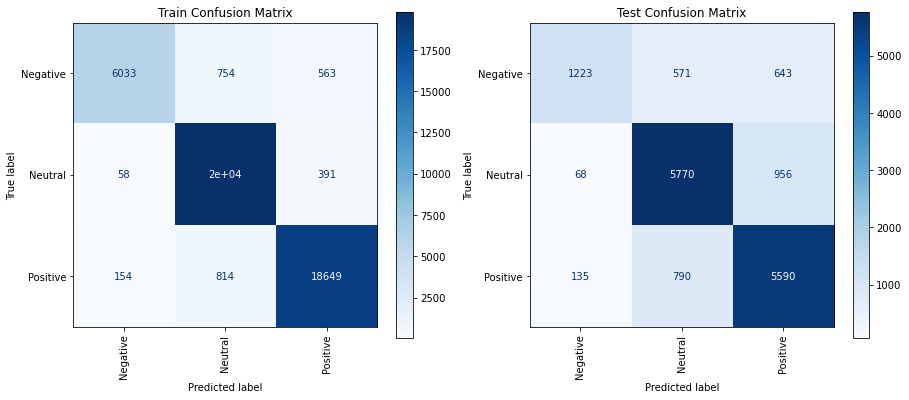

              precision    recall  f1-score   support

    Negative       0.86      0.50      0.63      2437
     Neutral       0.81      0.85      0.83      6794
    Positive       0.78      0.86      0.82      6515

    accuracy                           0.80     15746
   macro avg       0.81      0.74      0.76     15746
weighted avg       0.80      0.80      0.79     15746



Decision Tree Results:


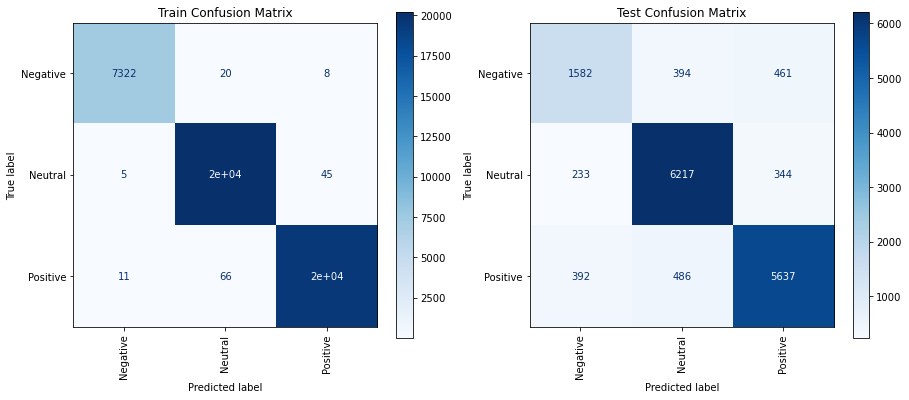

              precision    recall  f1-score   support

    Negative       0.72      0.65      0.68      2437
     Neutral       0.88      0.92      0.90      6794
    Positive       0.88      0.87      0.87      6515

    accuracy                           0.85     15746
   macro avg       0.82      0.81      0.82     15746
weighted avg       0.85      0.85      0.85     15746



Random Forest Results:


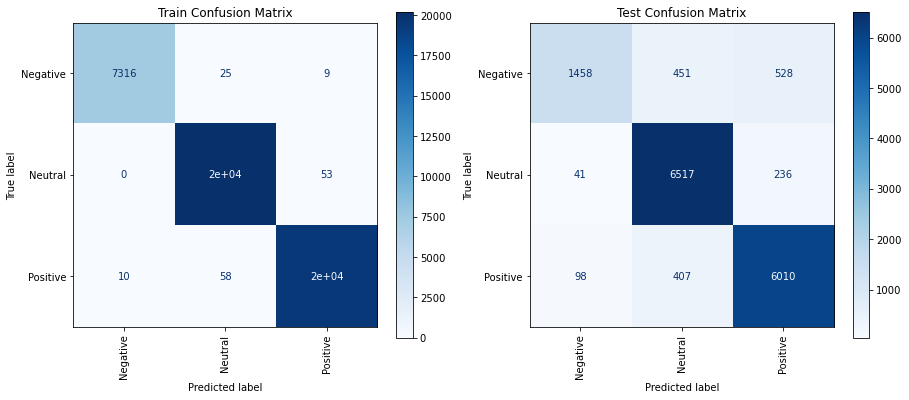

              precision    recall  f1-score   support

    Negative       0.91      0.60      0.72      2437
     Neutral       0.88      0.96      0.92      6794
    Positive       0.89      0.92      0.90      6515

    accuracy                           0.89     15746
   macro avg       0.89      0.83      0.85     15746
weighted avg       0.89      0.89      0.88     15746



Gradient Boost Results:


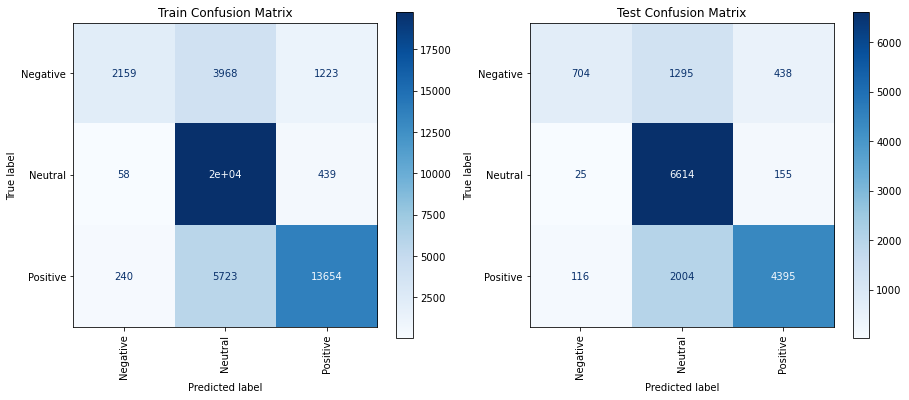

              precision    recall  f1-score   support

    Negative       0.83      0.29      0.43      2437
     Neutral       0.67      0.97      0.79      6794
    Positive       0.88      0.67      0.76      6515

    accuracy                           0.74     15746
   macro avg       0.79      0.65      0.66     15746
weighted avg       0.78      0.74      0.72     15746



AdaBoost Results:


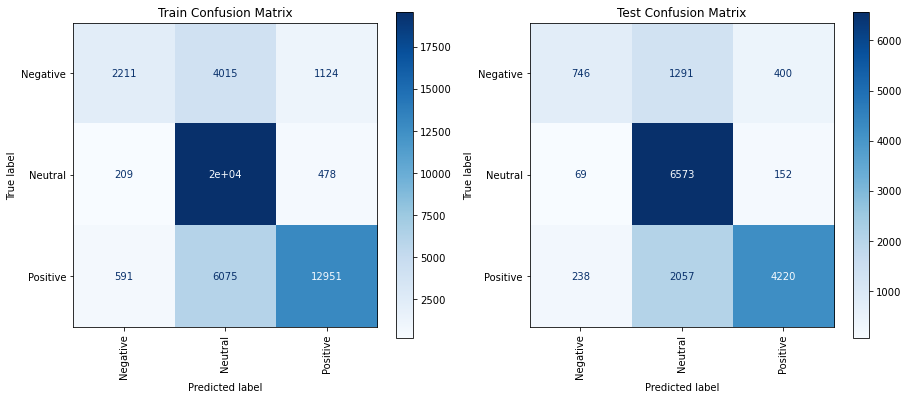

              precision    recall  f1-score   support

    Negative       0.71      0.31      0.43      2437
     Neutral       0.66      0.97      0.79      6794
    Positive       0.88      0.65      0.75      6515

    accuracy                           0.73     15746
   macro avg       0.75      0.64      0.65     15746
weighted avg       0.76      0.73      0.71     15746



XGBoost Results:
[09:51:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


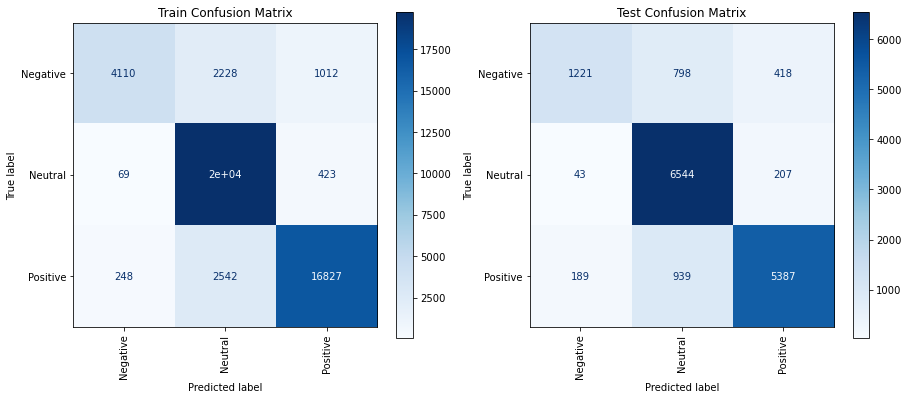

              precision    recall  f1-score   support

    Negative       0.84      0.50      0.63      2437
     Neutral       0.79      0.96      0.87      6794
    Positive       0.90      0.83      0.86      6515

    accuracy                           0.84     15746
   macro avg       0.84      0.76      0.79     15746
weighted avg       0.84      0.84      0.83     15746



CatBoost Results:


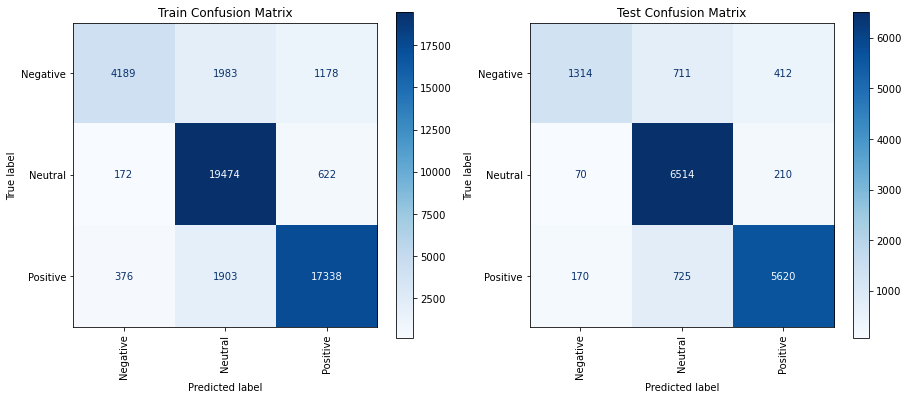

              precision    recall  f1-score   support

    Negative       0.85      0.54      0.66      2437
     Neutral       0.82      0.96      0.88      6794
    Positive       0.90      0.86      0.88      6515

    accuracy                           0.85     15746
   macro avg       0.86      0.79      0.81     15746
weighted avg       0.86      0.85      0.85     15746





,Precision Score,Recall Score,Accuracy Score,F1 Score
Logistic Regression,79.42%,80.13%,82.94%,79.75%
Nearest Neighbors,64.35%,57.12%,62.32%,58.04%
Naive Bayes,77.52%,73.57%,78.34%,74.69%
SVM,81.48%,73.64%,79.91%,75.92%
Decision Tree,82.26%,80.98%,85.33%,81.55%
Random Forest,89.46%,82.67%,88.82%,84.91%
Gradient Boost,79.38%,64.57%,74.39%,66.16%
AdaBoost,75.18%,64.04%,73.28%,65.39%
XGBoost,84.22%,76.37%,83.53%,78.53%
CatBoost,85.51%,78.69%,85.41%,80.77%


The model with the highest precision score is Random Forest.
The model with the highest recall score is Random Forest.
The model with the highest accuracy score is Random Forest.
The model with the highest F1 score is Random Forest.


In [10]:
models = m(x_train, x_test, y_train, y_test, objects=objects, index=index)

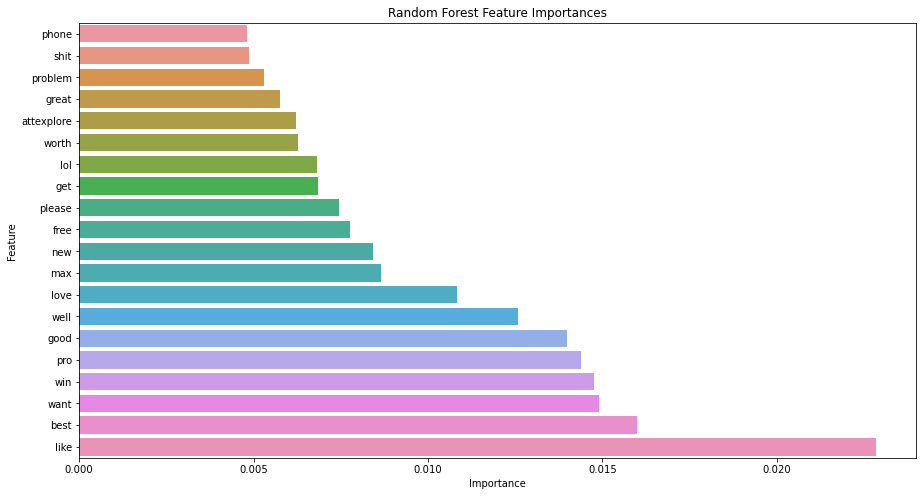

In [11]:
importances = sorted(list(zip(models[5].feature_importances_, vectorizer.get_feature_names())))[-20:]
plot = pd.DataFrame(importances, columns=['Importance', 'Feature'])

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=plot, y='Feature', x='Importance')
ax.set_title(f'{index[5]} Feature Importances')
plt.show();

In [12]:
words_dict = dict(zip(vectorizer.get_feature_names(), models[5].feature_importances_))

In [13]:
words_dict

{'aa': 1.806627459172652e-05,
 'aaa': 2.0279516782714037e-05,
 'aaaaa': 2.2205456543476977e-06,
 'aaaaaaaa': 3.6868635231233295e-08,
 'aaaaaaaaaa': 8.169590490388654e-07,
 'aaaaaahhhh': 3.387906870974284e-06,
 'aaaaand': 3.69191658505234e-07,
 'aaaaat': 3.2745572300122104e-06,
 'aaaahhh': 2.762541985099253e-06,
 'aaaamhim': 6.909795033230317e-08,
 'aaaggh': 6.856919216926281e-09,
 'aaalllennnndjsj': 3.928459813128157e-09,
 'aabidahcrayola': 4.1428899081748745e-09,
 'aachen': 4.213819255455408e-08,
 'aadh': 1.2417112055477105e-07,
 'aadiiii': 1.3589762560278552e-10,
 'aadilba': 3.106353252634342e-09,
 'aagaya': 9.993250572738217e-08,
 'aagazette': 5.679322618550432e-07,
 'aah': 0.0,
 'aahe': 7.391071665052494e-07,
 'aahh': 4.294270579667027e-06,
 'aahhh': 1.506264926185485e-06,
 'aail': 6.393617298397103e-07,
 'aaj': 1.5938185917640278e-06,
 'aaja': 3.159557090325572e-09,
 'aam': 1.8997355638985789e-06,
 'aamaanil': 3.836960276244079e-09,
 'aameen': 4.874974667970428e-07,
 'aamiin': 1.1

In [14]:
features_dict = dict((k, words_dict[k]) for k in ['battery', 'display', 'camera', 'pro', 'max', 'price', 'upgrade', 'color', 'screen'] if k in words_dict)

In [15]:
features_dict

{'battery': 0.002760713348456339,
 'display': 0.0010502788222765548,
 'camera': 0.0032978451544793254,
 'pro': 0.014390490478638907,
 'max': 0.008663417598248319,
 'price': 0.0009343863463075144,
 'upgrade': 0.0021971041108617474,
 'color': 0.0008691467969392243,
 'screen': 0.001673158786459026}

In [16]:
features_df = pd.DataFrame(list(features_dict.items()), columns=['Feature', 'Importances'])

In [17]:
features_df

,Feature,Importances
0,battery,0.002761
1,display,0.001050
2,camera,0.003298
3,pro,0.014390
4,max,0.008663
5,price,0.000934
6,upgrade,0.002197
7,color,0.000869
8,screen,0.001673


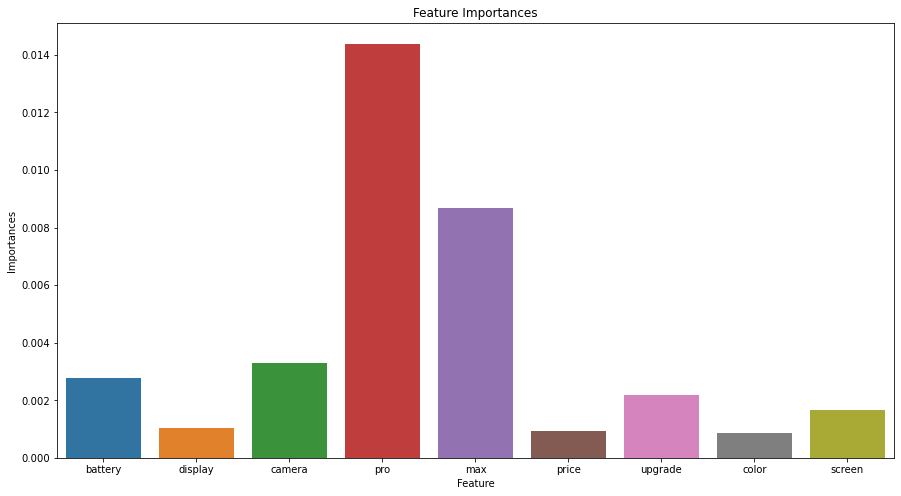

In [18]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=features_df, y='Importances', x='Feature')
ax.set_title('Feature Importances')
plt.show();